## Importazione di librerie

In [4]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import warnings
warnings.filterwarnings('ignore')
from nltk.corpus import stopwords
from sklearn.feature_extraction.text import TfidfTransformer, CountVectorizer
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
import string, nltk
from nltk import word_tokenize
from nltk.stem import PorterStemmer
from nltk.stem import WordNetLemmatizer

## Lettura Dataset

*Viene prelevato il Dataset grezzo (non ancora pre-processato) e ne vengono stampate le prime righe, in modo da avere una prima idea della struttura del Set.*

In [5]:
raw_dataset = pd.read_csv('../data/raw_dataset.csv')
raw_dataset.head() 

,category,rating,label,text_
0,Home_and_Kitchen_5,5.0,CG,"Love this! Well made, sturdy, and very comfor..."
1,Home_and_Kitchen_5,5.0,CG,"love it, a great upgrade from the original. I..."
2,Home_and_Kitchen_5,5.0,CG,This pillow saved my back. I love the look and...
3,Home_and_Kitchen_5,1.0,CG,"Missing information on how to use it, but it i..."
4,Home_and_Kitchen_5,5.0,CG,Very nice set. Good quality. We have had the s...


In [6]:
# Rimuovi "_5" dalla fine delle categorie
raw_dataset['category'] = raw_dataset['category'].str.replace(r'_5$', '', regex=True)

**Modifica nomi categorie**

In questa cella sono stati migliorati i nomi delle categorie per una migliore leggibilità.

In [7]:
raw_dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 40432 entries, 0 to 40431
Data columns (total 4 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   category  40432 non-null  object 
 1   rating    40432 non-null  float64
 2   label     40432 non-null  object 
 3   text_     40432 non-null  object 
dtypes: float64(1), object(3)
memory usage: 1.2+ MB


**Stampa informazioni dettagliate del Dataset ancora grezzo**

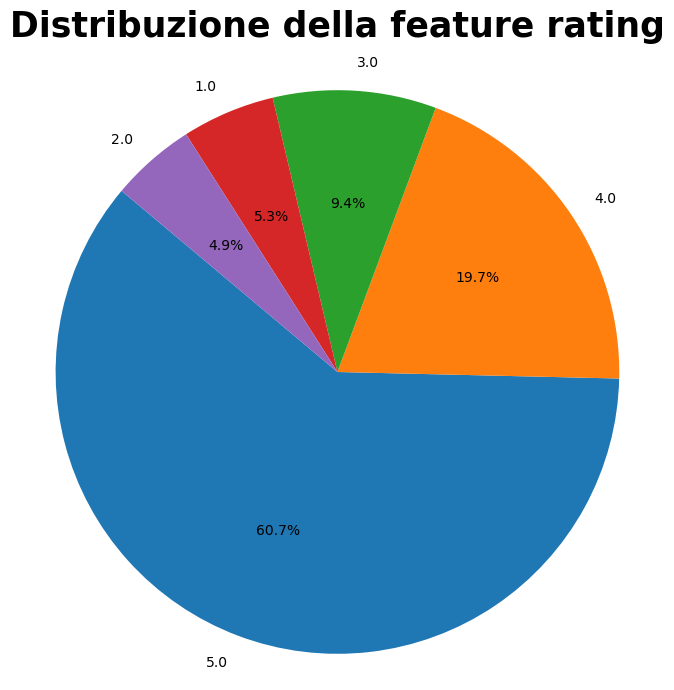

In [8]:
# Sostituisci 'category' con il nome effettivo della tua feature
feature_da_visualizzare = 'rating'

# Calcola la distribuzione dei valori nella feature
conteggio_valori = raw_dataset[feature_da_visualizzare].value_counts()

# Crea il grafico a torta
plt.figure(figsize=(8, 8))  # Imposta la dimensione del grafico
plt.pie(conteggio_valori, labels=conteggio_valori.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribuzione della feature {feature_da_visualizzare}',fontweight='bold',fontsize=25,pad=20)
plt.axis('equal')  # Imposta l'asse in modo che il grafico sia circolare

# Mostra il grafico
plt.show()

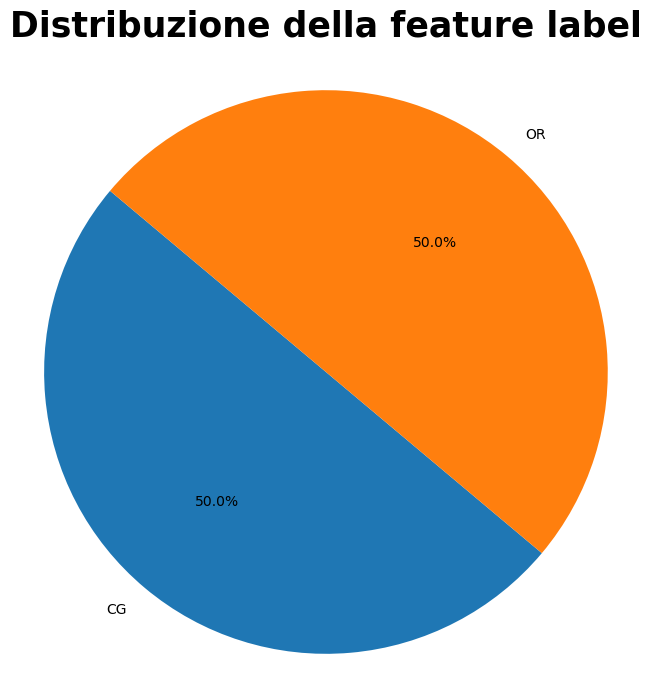

In [9]:
# Sostituisci 'category' con il nome effettivo della tua feature
feature_da_visualizzare = 'label'

# Calcola la distribuzione dei valori nella feature
conteggio_valori = raw_dataset[feature_da_visualizzare].value_counts()

# Crea il grafico a torta
plt.figure(figsize=(8, 8))  # Imposta la dimensione del grafico
plt.pie(conteggio_valori, labels=conteggio_valori.index, autopct='%1.1f%%', startangle=140)
plt.title(f'Distribuzione della feature {feature_da_visualizzare}',fontweight='bold',fontsize=25,pad=20)
plt.axis('equal')  # Imposta l'asse in modo che il grafico sia circolare

# Mostra il grafico
plt.show()

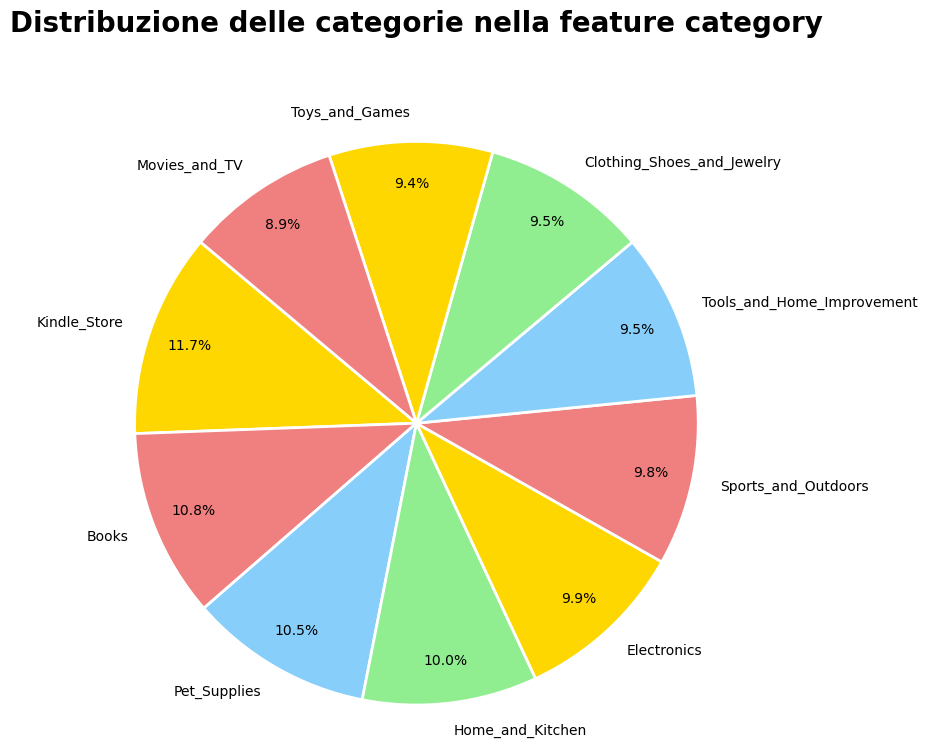

In [10]:
# Sostituisci 'category' con il nome effettivo della tua feature
feature_da_visualizzare = 'category'

# Calcola la distribuzione dei valori nella feature "category"
conteggio_categorie = raw_dataset[feature_da_visualizzare].value_counts()

# Crea un array di colori per il grafico a torta
colors = ['gold', 'lightcoral', 'lightskyblue', 'lightgreen']

# Crea il grafico a torta
plt.figure(figsize=(8, 8))
plt.pie(conteggio_categorie, labels=conteggio_categorie.index, autopct='%1.1f%%', startangle=140,
        colors=colors, wedgeprops={'linewidth': 2, 'edgecolor': 'white'},
        labeldistance=1.1, pctdistance=0.85)
plt.title(f'Distribuzione delle categorie nella feature {feature_da_visualizzare}', fontweight='bold',fontsize=20,pad=60)
plt.axis('equal')

# Mostra il grafico
plt.show()

In [11]:
raw_dataset.isnull().sum()

category    0
rating      0
label       0
text_       0
dtype: int64

**Conteggio valori nulli**

Per ogni colonna (feature) vengono conteggiati quanti volori nulli sono presenti nel Dataset.